### Problem 1: Edge Detection

In [1]:
# Imports
%pip install opencv-python
import numpy as np
import cv2
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


##### a)

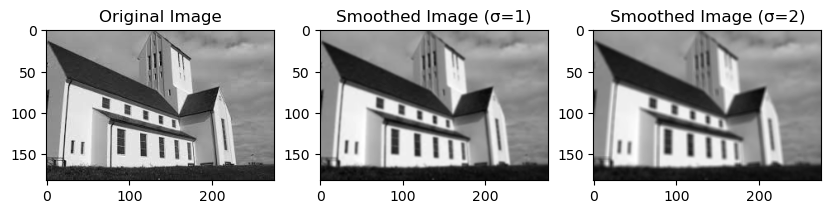

In [2]:
# Load Image
image = cv2.imread('image1.png', cv2.IMREAD_GRAYSCALE)

# Gaussian Filter Definition
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

# Apply 5x5 Gaussian filter with sigma = 1
gaussian_filter_1 = gaussian_kernel(5, 1)
smoothed_image_1 = cv2.filter2D(image, -1, gaussian_filter_1)

# Apply 5x5 Gaussian filter with sigma = 2
gaussian_filter_2 = gaussian_kernel(5, 2)
smoothed_image_2 = cv2.filter2D(image, -1, gaussian_filter_2)

# Plot the original and smoothed images together in a single plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(smoothed_image_1, cmap='gray')
plt.title('Smoothed Image (σ=1)')

plt.subplot(1, 3, 3)
plt.imshow(smoothed_image_2, cmap='gray')
plt.title('Smoothed Image (σ=2)')

plt.show()

##### b)

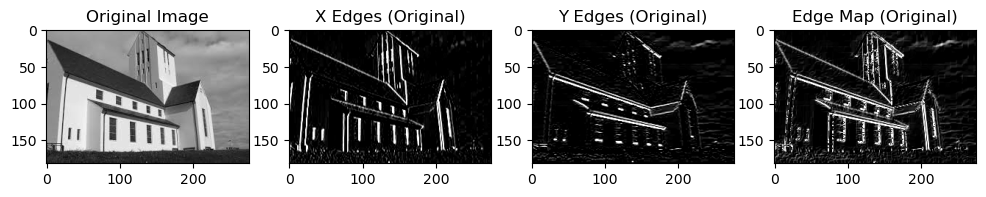

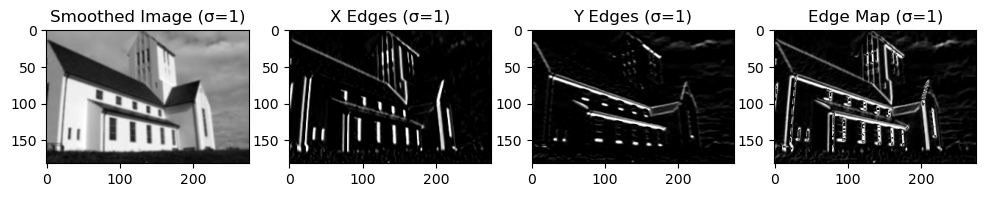

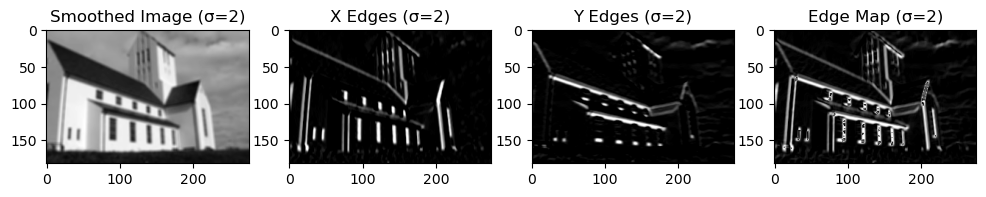

In [3]:
# 3x3 Sobel Filters
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Convolving Sobel filters with the three images from part a
edges_x_original = cv2.filter2D(image, -1, sobel_x)
edges_y_original = cv2.filter2D(image, -1, sobel_y)

edges_x_sigma1 = cv2.filter2D(smoothed_image_1, -1, sobel_x)
edges_y_sigma1 = cv2.filter2D(smoothed_image_1, -1, sobel_y)

edges_x_sigma2 = cv2.filter2D(smoothed_image_2, -1, sobel_x)
edges_y_sigma2 = cv2.filter2D(smoothed_image_2, -1, sobel_y)

# Combine x and y into a map that contains both together for each image
edge_map_original = np.abs(edges_x_original) + np.abs(edges_y_original)
edge_map_sigma1 = np.abs(edges_x_sigma1) + np.abs(edges_y_sigma1)
edge_map_sigma2 = np.abs(edges_x_sigma2) + np.abs(edges_y_sigma2)

# Plot the results
plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# X edges for original image
plt.subplot(1, 4, 2)
plt.imshow(edges_x_original, cmap='gray')
plt.title('X Edges (Original)')

# Y edges for original image
plt.subplot(1, 4, 3)
plt.imshow(edges_y_original, cmap='gray')
plt.title('Y Edges (Original)')

# Combined edges for original image
plt.subplot(1, 4, 4)
plt.imshow(edge_map_original, cmap='gray')
plt.title('Edge Map (Original)')

# Smoothed image (σ=1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(smoothed_image_1, cmap='gray')
plt.title('Smoothed Image (σ=1)')

# X edges for smoothed image (σ=1)
plt.subplot(1, 4, 2)
plt.imshow(edges_x_sigma1, cmap='gray')
plt.title('X Edges (σ=1)')

# Y edges for smoothed image (σ=1)
plt.subplot(1, 4, 3)
plt.imshow(edges_y_sigma1, cmap='gray')
plt.title('Y Edges (σ=1)')

# Combined edges for smoothed image (σ=1)
plt.subplot(1, 4, 4)
plt.imshow(edge_map_sigma1, cmap='gray')
plt.title('Edge Map (σ=1)')

# Smoothed image (σ=2)
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(smoothed_image_2, cmap='gray')
plt.title('Smoothed Image (σ=2)')

# X edges for smoothed image (σ=2)
plt.subplot(1, 4, 2)
plt.imshow(edges_x_sigma2, cmap='gray')
plt.title('X Edges (σ=2)')

# Y edges for smoothed image (σ=2)
plt.subplot(1, 4, 3)
plt.imshow(edges_y_sigma2, cmap='gray')
plt.title('Y Edges (σ=2)')

# Combined edges for smoothed image (σ=2)
plt.subplot(1, 4, 4)
plt.imshow(edge_map_sigma2, cmap='gray')
plt.title('Edge Map (σ=2)')

plt.show()

##### c)

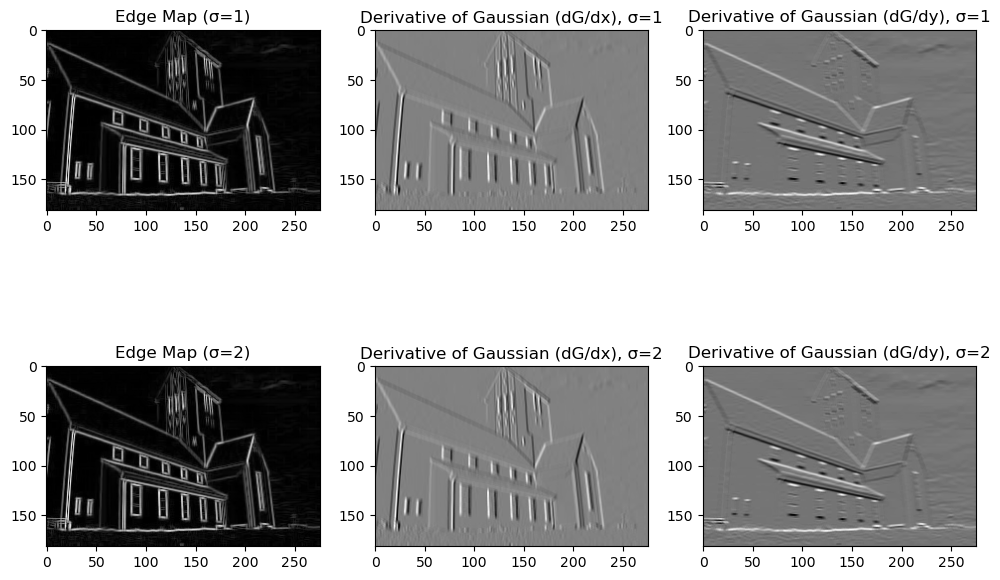

In [4]:
# Gaussian Filter Function
def gaussian_kernel(size, sigma):
    x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Derivative of Gaussian Function
def apply_derivative_of_gaussian(image, sigma, direction):
    # Compute the 5x5 Gaussian kernel
    gaussian_filter = gaussian_kernel(5, sigma)
    
    # Compute the derivative of Gaussian filter for the specified direction
    if direction == 'x' or direction == 'X':
        filter_x = cv2.Sobel(gaussian_filter, cv2.CV_64F, 1, 0, ksize=5)
        result = cv2.filter2D(image, cv2.CV_64F, filter_x)
    else:
        filter_y = cv2.Sobel(gaussian_filter, cv2.CV_64F, 0, 1, ksize=5)
        result = cv2.filter2D(image, cv2.CV_64F, filter_y)
    return result

# Apply the convolution with dG/dx and dG/dy filters for sigma = 1
derivative_x_1 = apply_derivative_of_gaussian(image, 1, 'x')
derivative_y_1 = apply_derivative_of_gaussian(image, 1, 'y')

# Apply the convolution with dG/dx and dG/dy filters for sigma = 2
derivative_x_2 = apply_derivative_of_gaussian(image, 2, 'x')
derivative_y_2 = apply_derivative_of_gaussian(image, 2, 'y')

# Combine edges in x and y directions to get the final edge map
edge_map_1 = np.sqrt(derivative_x_1**2 + derivative_y_1**2)
edge_map_2 = np.sqrt(derivative_x_2**2 + derivative_y_2**2)

# Plot the outputs
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(edge_map_1, cmap='gray')
plt.title('Edge Map (σ=1)')

plt.subplot(2, 3, 2)
plt.imshow(derivative_x_1, cmap='gray')
plt.title('Derivative of Gaussian (dG/dx), σ=1')

plt.subplot(2, 3, 3)
plt.imshow(derivative_y_1, cmap='gray')
plt.title('Derivative of Gaussian (dG/dy), σ=1')

plt.subplot(2, 3, 4)
plt.imshow(edge_map_2, cmap='gray')
plt.title('Edge Map (σ=2)')

plt.subplot(2, 3, 5)
plt.imshow(derivative_x_2, cmap='gray')
plt.title('Derivative of Gaussian (dG/dx), σ=2')

plt.subplot(2, 3, 6)
plt.imshow(derivative_y_2, cmap='gray')
plt.title('Derivative of Gaussian (dG/dy), σ=2')

plt.show()

##### Final Output Observations

The final output of c is significantly more accurate than the final output of b.

By looking at the combined edge maps in both b and c, it is evident that the convolution process in part c better detects and captures the edges we are interested in reconstructing an image from.

The convolution process in part b leads to noise that displays edges that are seen as noise as they are irrelevant, as is evident by looking at the sky in the upper-right corner of the image. It also fails to detect the edges of the building as well as part c does, which can be observed by looking at the windows of the building in both images.

### Problem 2: Corner Detection

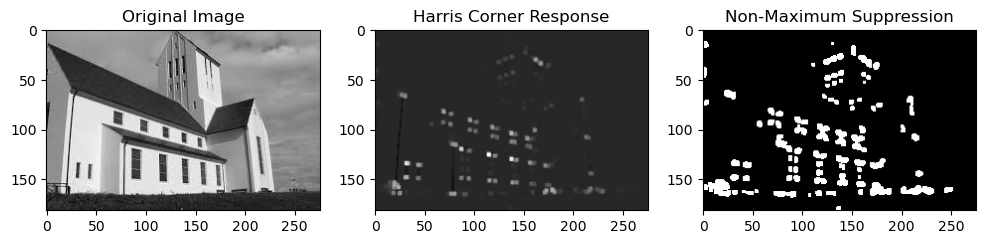

In [5]:
# Step 1: Spatial Derivative Calculation
Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Step 2: Structure Tensor Setup (M = [Ix^2, IxIy; IxIy, Iy^2])
IxIx = cv2.GaussianBlur(Ix * Ix, (5, 5), 1)
IyIy = cv2.GaussianBlur(Iy * Iy, (5, 5), 1)
IxIy = cv2.GaussianBlur(Ix * Iy, (5, 5), 1)

M = np.array([[IxIx, IxIy], [IxIy, IyIy]])

# Step 4: Harris Corner Response Calculation
k = 0.04
det_M = M[0, 0] * M[1, 1] - M[0, 1] * M[1, 0]
trace_M = M[0, 0] + M[1, 1]
R = det_M - k * trace_M**2

# Step 5: Non-Maximum Suppression
R = cv2.dilate(R, None)
non_max_suppression = np.zeros_like(R)
non_max_suppression[R > 0.01 * R.max()] = 1

# Plotting Output
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Harris Corner Response Map
plt.subplot(1, 3, 2)
plt.imshow(R, cmap='gray')
plt.title('Harris Corner Response')

# Non-Maximum Suppression
plt.subplot(1, 3, 3)
plt.imshow(non_max_suppression, cmap='gray')
plt.title('Non-Maximum Suppression')

plt.show()